# Average Mutual Information

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df = pd.read_table('LORENZ.DAT', header=None)

In [3]:
df.shape

(16384, 1)

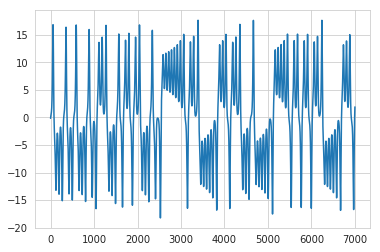

In [4]:
plt.plot(df[0:7000])

In [5]:
a = np.array(df).flatten()

In [6]:
ami_list = []
t_list = []
bins = 100

for t in range(0, bins):
    ami = 0
    
    # handling delay data
    if (t == 0):
        unlagged = a
        lagged = a
    elif (t != 0):
        unlagged = a[:-t]
        lagged = np.roll(a, -t)[:-t]
    
    # create histgram
    if (len(unlagged) != len(lagged)):
        print('shape error')
        break
    else:
        N = len(unlagged)
        counts_a, edges_a = np.histogram(unlagged, bins=bins)
        counts_b, edges_b = np.histogram(lagged, bins=bins)
        counts_ab, xedges, yedges = np.histogram2d(unlagged, lagged, bins=bins)
    
    # bin_indices = np.digitize(a, edges)
    # discrete = a[bin_indices] # mode
    
    # calc AMI
    for i in range(0, bins):
        p_a = counts_a[i] / N

        for j in range(0, bins):
            p_b = counts_b[j] / N
            p_ab = counts_ab[i][j] / N
            
            if (p_a != 0) & (p_b != 0) & (p_ab != 0):
                ami += p_ab * (np.log2(p_ab / (p_a * p_b)))
                
    ami_list.append(ami)
    t_list.append(t)

Text(0,0.5,'I(T)')

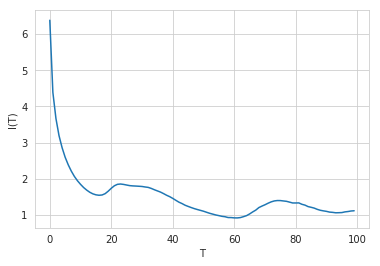

In [7]:
plt.plot(t_list, ami_list)
plt.xlabel('T')
plt.ylabel('I(T)')

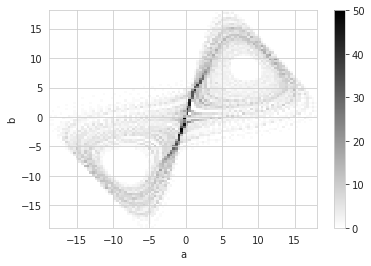

In [8]:
plt.hist2d(a[:-17], np.roll(a, -17)[:-17], bins=bins, cmap=plt.cm.binary)
plt.colorbar()
plt.xlabel('a')
plt.ylabel('b')
plt.show()

### Ref
+ http://www.node99.org/tutorials/ar/
+ http://haretoke.hatenablog.jp/entry/2017/07/18/171819